In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
input_file = ('data_multivar.txt')
# Load data
x = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = [float(i) for i in line.split(',')]
        x.append(data)
data = np.array(x)
num_clusters = 4


In [3]:
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
kmeans.fit(data)


KMeans(n_clusters=4)

In [4]:
# Step size of the mesh
step_size = 0.01
# Plot the boundaries
x_min, x_max = min(data[:, 0]) - 1, max(data[:, 0]) + 1
y_min, y_max = min(data[:, 1]) - 1, max(data[:, 1]) + 1
x_values, y_values = np.meshgrid(np.arange(x_min, x_max,
step_size), np.arange(y_min, y_max, step_size))
# Predict labels for all points in the mesh
predicted_labels = kmeans.predict(np.c_[x_values.ravel(),
y_values.ravel()])

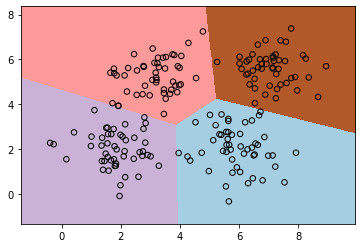

In [5]:
# Plot the results
predicted_labels = predicted_labels.reshape(x_values.shape)
plt.figure()
plt.clf()
plt.imshow(predicted_labels, interpolation='nearest', extent=(x_values.min(), x_values.max(), y_values.min(), y_values.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower')
plt.scatter(data[:,0], data[:,1], marker='o', facecolors='none', edgecolors='k', s=30)

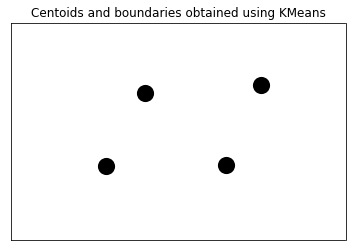

In [6]:
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=200, linewidths=3, color='k', zorder=10, facecolors='black')
x_min, x_max = min(data[:, 0]) - 1, max(data[:, 0]) + 1
y_min, y_max = min(data[:, 1]) - 1, max(data[:, 1]) + 1
plt.title('Centoids and boundaries obtained using KMeans')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
